## Actividad Módulo 10: Visualización de Datos

Mediante el uso de gráficos de su preferencia, muestre la relación que guardan la esperanza de vida para ambos sexos para el año 2020 con la esperanza de vida la nacer. Asimismo, determine qué variables de esta base de datos se encuentran más correlacionadas en dicho año. Interprete sus resultados.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_original = pd.read_csv('SYB65_246_202209_Population Growth, Fertility and Mortality Indicators.csv', encoding='latin1', skiprows=1)

In [17]:
# Limpiar dataframe
from pyparsing import col


df = df_original[(~df_original['Unnamed: 1'].str.contains('Total')) & (df_original['Year'] == 2022)]
df = df.rename({'Region/Country/Area':'region/country/area', 'Unnamed: 1': 'country', 'Year': 'year', 'Series': 'series', 'Value': 'value', 'Footnotes':'footnotes', 'Source': 'source'}, axis='columns')

df = df.pivot(index=['country'], columns=['series'], values='Avalue')

# Pasar todas las columnas a floats
df = df.astype('float64')

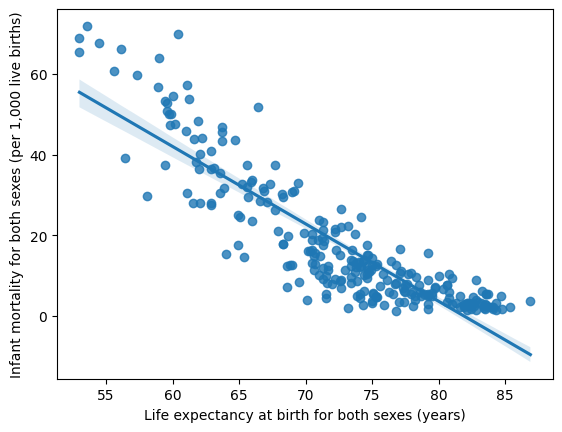

In [18]:
x = 'Life expectancy at birth for both sexes (years)'
y = 'Infant mortality for both sexes (per 1,000 live births)'

g = sns.regplot(data=df, x=x, y=y)

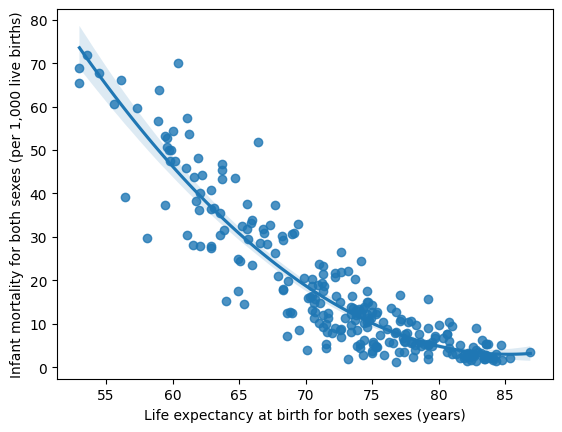

In [19]:
x = 'Life expectancy at birth for both sexes (years)'
y = 'Infant mortality for both sexes (per 1,000 live births)'

g = sns.regplot(data=df, x=x, y=y, order=2)

Como se puede apreciar en el gráfico de regresión, hay una notable correlación entre las variables del ínide de mortalidadd de los dos sexos y la expectativa de vida. Sin embargo, se puede observar que en el segundo gráfico las observaciones se ajustan mejor a una regresión no lineal de segundo órden

<AxesSubplot: xlabel='series', ylabel='series'>

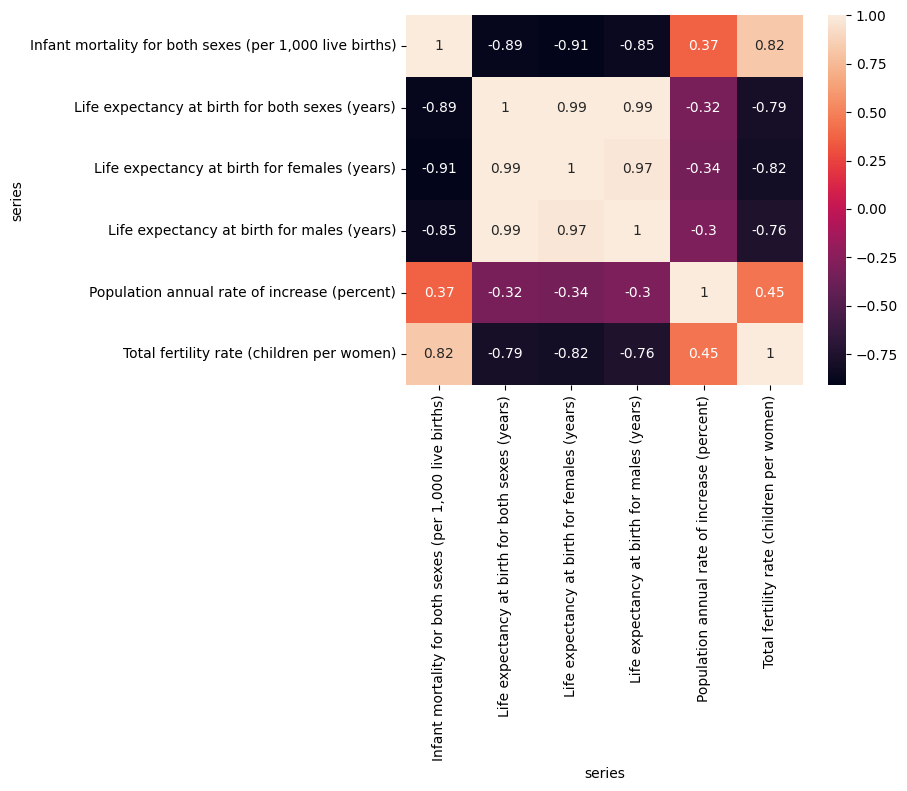

In [20]:
sns.heatmap(df.corr(), annot=True)

Se puede ver a través del gráfico de calor:
- La tasa de crecimiento anual en la población no tiene correlación con las demás variables.
- De manera obvia, las variables de expectativa de vida (de hombres, mujeres y ambos sexos) tienen una correlación muy alta puesto que se tratan de conceptos prácticamente iguales.
- Como vimos en el ejercicio anterior, la mortalidad infantil por cada 1,000 nacimientos vivos tiene una correlación inversa alta con la expectativa de vida para ambos sexos. Dado que la expectativa de vida de ambos sexos está intimamente relacionada con las otras dos variables de expectativa de vida (de hombres y mujeres), por lo que no es de sorprenderse que también tenga una correlación fuerte con esas dos variables.
- Otra variable que tiene una correlación alta con la mortalidad infantil de ambos sexos por cada 1,000 nacimientos vivos es la tasa de fertilidad, medida en número de hijos por mujer. Esta correlación se podría explicar a través de las ya estudiadas correlaciones:
    - Positiva entre nivel de desarrollo y la educación de los países
    - Negativa entre el nivel de educación y el número de hijos por mujer
    - Negativa entre el nivel de desarrollo y la tasa de mortalidad, debido a la mejor infraestructura médica